# General Preparations

In [1]:
import sys
sys.path.insert(0, '/yunity/arusty/PF-GAP')

#Import libraries, MDS from SKlearn, and all the custom files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from Pipeline.functions import *


#Data
from aeon.datasets import load_gunpoint
from aeon.datasets import load_basic_motions


#Functions
from QGAP.qgap import QGAP
from Redcomets.Redcomets import REDCOMETS
from RFGAP_Rocket.RFGAP_Rocket import RFGAP_Rocket
from RDST.rdst import RDST_GAP

In [2]:
# Load Data
XTRAIN, YTRAIN = load_gunpoint(split="TRAIN")
XTEST, YTEST = load_gunpoint(split="TEST")

# XTRAIN, YTRAIN = load_basic_motions(split="TRAIN")
# XTEST, YTEST = load_basic_motions(split="TEST")

#Generate random static variables to test algorithm
XSTATIC = np.random.rand(XTRAIN.shape[0], 45)
XSTATIC_TEST = np.random.rand(XTEST.shape[0], 45)


In [3]:
#Quant
qgap = QGAP(matrix_type="dense")
quant_prox = data_to_proximities(qgap, XTRAIN, YTRAIN, XTEST, XSTATIC,XSTATIC_TEST)

#Redcomets
redcomets = REDCOMETS(variant = 3, static = XSTATIC)
reddcomets_prox = data_to_proximities(redcomets, XTRAIN, YTRAIN, XTEST, None , None)

# Rocket
rf_rocket = RFGAP_Rocket(prediction_type = "classification", rocket = "Multi",
                         n_kernels=512) # Rocket Kwargs
rocket_prox = data_to_proximities(rf_rocket, XTRAIN, YTRAIN, XTEST, XSTATIC , XSTATIC_TEST)

# RDST
rdst = RDST_GAP(save_transformed_data = True)
rdst_prox = data_to_proximities(rdst, XTRAIN, YTRAIN, None, XSTATIC , None)


In [4]:
type(rocket_prox), type(rdst_prox), type(quant_prox), type(reddcomets_prox)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

# Building MDS Veiwpoints

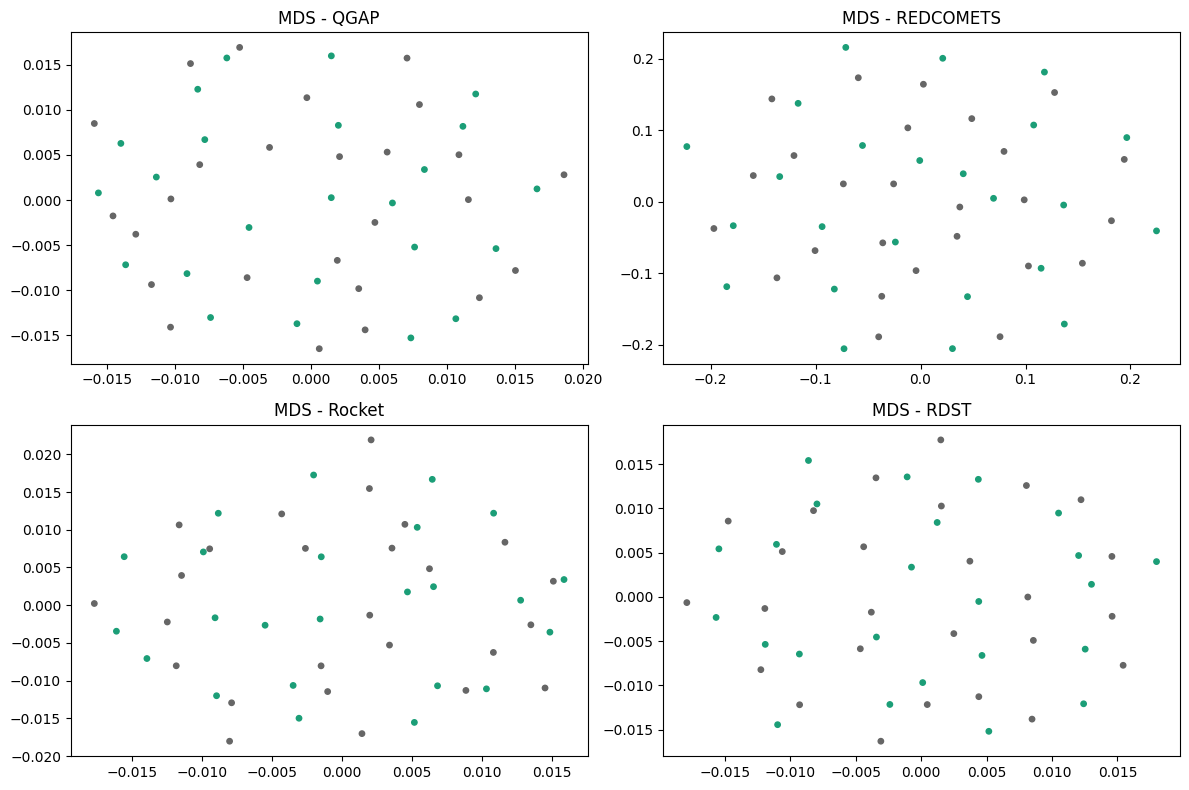

In [ ]:
# Initialize MDS
def build_mds(prox):
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    symetric = (prox + prox.T) / 2
    mds_prox = mds.fit_transform(symetric)
    return mds_prox

# Build MDS for each method
mds_quant = build_mds(quant_prox)
mds_redcomets = build_mds(reddcomets_prox)
mds_rocket = build_mds(rocket_prox)
mds_rdst = build_mds(rdst_prox)

# Plot the results
colors = YTRAIN.astype(int)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(mds_quant[:, 0], mds_quant[:, 1], c=colors, cmap='Dark2', marker='o', s=15)
plt.title('MDS - QGAP')
plt.subplot(2, 2, 2)
plt.scatter(mds_redcomets[:, 0], mds_redcomets[:, 1], c=colors, cmap='Dark2', marker='o', s=15)
plt.title('MDS - REDCOMETS')
plt.subplot(2, 2, 3)
plt.scatter(mds_rocket[:, 0], mds_rocket[:, 1], c=colors, cmap='Dark2', marker='o', s=15)
plt.title('MDS - Rocket')
plt.subplot(2, 2, 4)
plt.scatter(mds_rdst[:, 0], mds_rdst[:, 1], c=colors, cmap='Dark2', marker='o', s=15)
plt.title('MDS - RDST')
plt.tight_layout()


In [22]:
from tabulate import tabulate

# Import necessary library for table display

# Define a function to calculate statistics
def calculate_statistics(data):
    return {
        "Mean": np.mean(data),
        "Std Dev": np.std(data)
    }

# Calculate statistics for each proximity
statistics = {
    "MDS - QGAP": calculate_statistics(mds_quant),
    "MDS - REDCOMETS": calculate_statistics(mds_redcomets),
    "MDS - Rocket": calculate_statistics(mds_rocket),
    "MDS - RDST": calculate_statistics(mds_rdst),
    "Prox - QGAP": calculate_statistics(quant_prox),
    "Prox - REDCOMETS": calculate_statistics(reddcomets_prox),
    "Prox - Rocket": calculate_statistics(rocket_prox),
    "Prox - RDST": calculate_statistics(rdst_prox),
}

# Prepare data for tabular display
table_data = [
    [key, stats["Mean"], stats["Std Dev"]]
    for key, stats in statistics.items()
]

# Display the table
print(tabulate(table_data, headers=["Proximity Type", "Mean", "Standard Deviation"], tablefmt="grid"))

+------------------+--------------+----------------------+
| Proximity Type   |         Mean |   Standard Deviation |
+==================+==============+======================+
| MDS - QGAP       | -2.25514e-19 |           0.00946757 |
+------------------+--------------+----------------------+
| MDS - REDCOMETS  | -2.43583e-15 |           0.112803   |
+------------------+--------------+----------------------+
| MDS - Rocket     |  3.20924e-19 |           0.00963507 |
+------------------+--------------+----------------------+
| MDS - RDST       | -5.20417e-20 |           0.00937628 |
+------------------+--------------+----------------------+
| Prox - QGAP      |  0.0194536   |           0.0236938  |
+------------------+--------------+----------------------+
| Prox - REDCOMETS |  0.253492    |           0.2003     |
+------------------+--------------+----------------------+
| Prox - Rocket    |  0.02        |           0.017884   |
+------------------+--------------+---------------------